# Available Libraries 
Checking what Libraries are present in this python 

In [2]:
!pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2

## Importing Libraries required

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline


nbformat                           5.1.3
nest-asyncio                       1.5.1
networkx                           2.5
nltk                               3.6.1
nose                               1.3.7
notebook                           6.3.0
numba                              0.53.1
numexpr                            2.7.3
numpy                              1.20.1
numpydoc                           1.1.0
olefile                            0.46
openpyxl                           3.0.7
packaging                          20.9
pandas                             1.2.4
pandocfilters                      1.4.3
paramiko                           2.7.2
parso                              0.7.0
partd                              1.2.0
path                               15.1.2
pathlib2                           2.3.5
pathspec                           0.7.0
patsy                              0.5.1
pep8                               1.7.1
pexpect                            4.8.0
pickleshare     

# Importing the CSV files 
There are two files to be imported
1. observations.csv
2. species_info.csv

In [4]:
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

#### Checking the first 5 rows of the two df

In [5]:
print("The first five rows of Observation csv file")
print(obs.head())

The first five rows of Observation csv file
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [6]:
print("The first five rows of the Species csv file")
print(species.head())

The first five rows of the Species csv file
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


# Preliminary Analysis
1. shape of the tables
2. column name of the tables
3. dtypes of the table
4. info on the table
5. description to whatever there is

### Shape of the Tables
#### 1. Obs

In [7]:
print("This is the shape of Observation csv file")
print(obs.shape)

This is the shape of Observation csv file
(23296, 3)


#### 2. Species

In [8]:
print("This is the shape of the species csv file")
print(species.shape)

This is the shape of the species csv file
(5824, 4)


### Column name for each of these table

In [9]:
# first is for obs
print(obs.columns)
print(species.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


### Dtypes

In [10]:
print(obs.dtypes)
print(species.dtypes)

scientific_name    object
park_name          object
observations        int64
dtype: object
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


#### Inference
The two tables have one common column: scientific_name
I want to check what unique names are present in these two columns

In [11]:
print(obs.scientific_name.nunique())

5541


In [12]:
print(species.scientific_name.nunique())

5541


They both have the same number of scientific names

### Info on the two tables

In [13]:
print(obs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [14]:
print(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


#### Inference
The species has many null rows, checking on each of those

In [15]:
print(species.isnull().sum())

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


Only the conservation status is null

### Checking on the summary statistics in obs

In [16]:
print(obs.describe())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


##### the scientific name in both the tables have 5000 odd species so we cannot do an easy box plot of that

# Checking on the different available categorical values of conservation status

In [17]:
print("There are " + str(species.conservation_status.nunique()) + " conservational status")
print("They are: ")
print(species.conservation_status.unique())
print("There are also " + str(species.conservation_status.isnull().sum()) + " NaN values present")

There are 4 conservational status
They are: 
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
There are also 5633 NaN values present


#### Inference
The NaN values show that we do not need to intervene, hence we will replace NaN with "No Intervention Required"

In [18]:
species['conservation_status'] = species['conservation_status'].fillna("No Intervention Required")
print(species.conservation_status.isnull().sum())
print(species.conservation_status.unique())

0
['No Intervention Required' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


#### checking shape of the column (number of rows in each one)

In [19]:
print(species.groupby("conservation_status").size())

conservation_status
Endangered                    16
In Recovery                    4
No Intervention Required    5633
Species of Concern           161
Threatened                    10
dtype: int64


### Checking what values are present in the column common names in species

In [20]:
print(species.common_names.nunique())
#print(species.common_names.unique())

5504


# Checking on the categories present in species

In [21]:
print(f"Number of categories there are in the species table is {species.category.nunique()}")
print(f"They are {species.category.unique()}")

Number of categories there are in the species table is 7
They are ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


#### Checking how many species are placed in each one

In [22]:
print(species.groupby("category").size())

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


# Checking how the shape of observation is 

In [23]:
print(obs.groupby("park_name").size())
print(obs.park_name.unique())
print(len(obs)/4)
print("the parks are equally divided among all the dataframe")

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
5824.0
the parks are equally divided among all the dataframe


## Making a new table
 to see what scientific_name and category (expect for "No Intervention Required") is like

In [24]:
conservation_category = species[species.conservation_status != 'No Intervention Required']\
                        .groupby(["conservation_status", "category"])['scientific_name']\
                        .count()\
                        .unstack()
#conservation_category = conservation_category.pivot(columns = 'conservation_status', index = 'category', \
                                                    #values = 'scientific_name')
print(conservation_category)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


### Plotting the conservation_category in a stacked bar plot

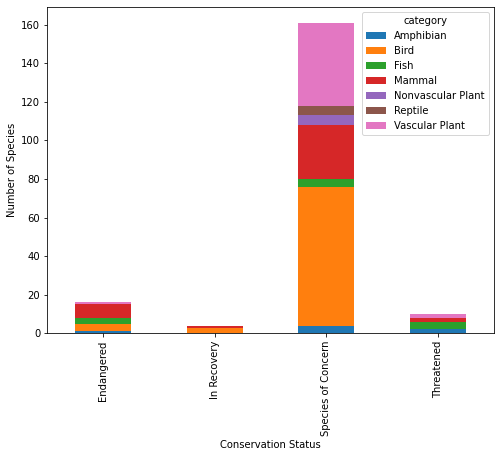

In [25]:
conservation_category.plot(kind = 'bar', figsize=(8, 6), stacked=True)
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.show()

### Now we know that some of the category are protected and some are not.
Lets see the ratio of these things

In [26]:
# creating a new column in species
species['is_protected'] = species.conservation_status != "No Intervention Required"
print(species.is_protected.head())

0    False
1    False
2    False
3    False
4    False
Name: is_protected, dtype: bool


In [27]:
# creating a table that tallies the category if they are protected or not
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot_table(columns='is_protected', 
                                    index = 'category',
                                    values = 'scientific_name')\
                        . reset_index()

# renaming the columns
category_counts.columns = ['category', 'not_protected', 'is_protected']
print(category_counts)

            category  not_protected  is_protected
0          Amphibian             72             7
1               Bird            413            75
2               Fish            115            11
3             Mammal            146            30
4  Nonvascular Plant            328             5
5            Reptile             73             5
6     Vascular Plant           4216            46


#### Changing it to ratios
Absolute numbers are difficult to interpretate, so we will keep them is percents

In [28]:
category_counts['percent_protected'] = (category_counts.is_protected)\
                                            / (category_counts.is_protected + category_counts.not_protected)*100
print(category_counts)

            category  not_protected  is_protected  percent_protected
0          Amphibian             72             7           8.860759
1               Bird            413            75          15.368852
2               Fish            115            11           8.730159
3             Mammal            146            30          17.045455
4  Nonvascular Plant            328             5           1.501502
5            Reptile             73             5           6.410256
6     Vascular Plant           4216            46           1.079305


# Finding if there are any significances
We will use a contingency table to tell us if there are any relationships between mammals and birds

In [29]:
# first importing the library
from scipy.stats import chi2_contingency
contingency_table1 = [[413, 75],
                    [146, 30]]
chi2, pval, dof, expected = chi2_contingency(contingency_table1)

print("for the contingency table " + str(contingency_table1))
if pval > 0.05:
    print("The P-value is Significant: " + str(np.round(pval, 2)))
else:
    print("The P-value is not Significant")

for the contingency table [[413, 75], [146, 30]]
The P-value is Significant: 0.69


Checking other pairs, like mammal and reptiles

In [30]:
contingency_table2 = [[146, 30], 
                      [73, 5]]
chi2, pval, dof, expected = chi2_contingency(contingency_table2)

print(f"For the contingency table between Mammals and reptiles: {contingency_table2}")
if pval > 0.05:
    print(f"The pval is Significant: {np.round(pval, 2)}")
else:
    print(f"The pval is not significant: {np.round(pval, 2)}")

For the contingency table between Mammals and reptiles: [[146, 30], [73, 5]]
The pval is not significant: 0.04


# Species in the Parks
To do this, we need to get the common names from the speicies to get an idea of how prevalent an animal is in a dataset. The data will be split up into their individual names

In [36]:
from itertools import chain
import string

# defining a function that will remove punctuation marks
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# common names of the animals are like "Grapper's Red-Backed Vole" or "American Bison, Bison"
# so we will remove the punctuation and convert the strings to lists of strings separated by ' '
#print(species.category.unique())
#print(species.common_names.unique())

common_Names = species[species.category == 'Mammal']\
               .common_names.apply(remove_punctuations)\
                .str.split().tolist()

print(common_Names[:6])

[['Gappers', 'RedBacked', 'Vole'], ['American', 'Bison', 'Bison'], ['Aurochs', 'Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated', 'Cattle'], ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'], ['Wapiti', 'Or', 'Elk'], ['WhiteTailed', 'Deer']]


Next step is to clean up the duplicates in each row so that they will not be counted more than one per species

In [37]:
clean_rows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    clean_rows.append(item)
    
print(clean_rows[:6])

[['Gappers', 'RedBacked', 'Vole'], ['American', 'Bison'], ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'], ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'], ['Wapiti', 'Or', 'Elk'], ['WhiteTailed', 'Deer']]


Now the words need to collapsed into one list for easier use

In [55]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows))
print(res[:6])

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']


Now the data is ready to be able to count the number of occourence of each word. We will create a dataframe for this 

In [76]:
word_counted = []

for i in res:
    x = res.count(i)
    word_counted.append(x)


    index      Word  Counts
0      51       Bat      23
1     110     Shrew      18
2      57    Myotis      17
3      88     Mouse      16
4     107  Chipmunk      13
5       3  American      12
6     105  Squirrel      12
7      37   Eastern      11
8       2      Vole      11
9      29  Mountain      10
10    134   Western      10


Creating the dataframe from the list

In [77]:
    
#print(list(zip(word_counted, res)))
# there are many duplicated present in the list
mammal_dic = {key: value for key, value in zip(res, word_counted)}
#print(mammal_dic)
df = pd.DataFrame(list(mammal_dic.items()))
df.columns = ['Word', 'Counts']
print(df.sort_values('Counts', ascending=False).reset_index().head(11))

    index      Word  Counts
0      51       Bat      23
1     110     Shrew      18
2      57    Myotis      17
3      88     Mouse      16
4     107  Chipmunk      13
5       3  American      12
6     105  Squirrel      12
7      37   Eastern      11
8       2      Vole      11
9      29  Mountain      10
10    134   Western      10


### Using Regex to understand what species are with their scientific names
We have many scientific names that are very complex to read, from the above table, we see that Bats are the largest species recorded. We will create a column in the species table where an animal is a bat or not and save the values as booleans

In [80]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

#checking the dataframe
#rint(species.head(10))

# checking the number of values of bat or not
print(species.groupby("is_bat").size())

is_bat
False    5801
True       23
dtype: int64


Checking on the is_protected for the is_bat column

In [84]:
print(species[species.is_bat == True].head(23))

     category            scientific_name  \
28     Mammal   Corynorhinus rafinesquii   
29     Mammal           Eptesicus fuscus   
30     Mammal  Lasionycteris noctivagans   
31     Mammal          Lasiurus borealis   
32     Mammal          Lasiurus cinereus   
36     Mammal              Myotis leibii   
37     Mammal           Myotis lucifugus   
38     Mammal     Myotis septentrionalis   
39     Mammal             Myotis sodalis   
40     Mammal       Nycticeius humeralis   
3033   Mammal         Antrozous pallidus   
3034   Mammal    Corynorhinus townsendii   
3035   Mammal           Eptesicus fuscus   
3036   Mammal          Euderma maculatum   
3037   Mammal  Lasionycteris noctivagans   
3038   Mammal          Lasiurus cinereus   
3040   Mammal         Myotis ciliolabrum   
3042   Mammal           Myotis lucifugus   
4461   Mammal             Eumops perotis   
4462   Mammal      Tadarida brasiliensis   
4463   Mammal    Corynorhinus townsendii   
4464   Mammal      Lasiurus blos

As we can see, some species require protecting and some do not

## Merging the obs table and the species table only where the bat species are true

In [85]:
bat_obs = obs.merge(species[species.is_bat])
print(bat_obs)

              scientific_name                            park_name  \
0       Lasiurus blossevillii                  Bryce National Park   
1       Lasiurus blossevillii  Great Smoky Mountains National Park   
2       Lasiurus blossevillii               Yosemite National Park   
3       Lasiurus blossevillii            Yellowstone National Park   
4    Corynorhinus rafinesquii               Yosemite National Park   
..                        ...                                  ...   
139            Myotis sodalis            Yellowstone National Park   
140             Myotis leibii               Yosemite National Park   
141             Myotis leibii                  Bryce National Park   
142             Myotis leibii  Great Smoky Mountains National Park   
143             Myotis leibii            Yellowstone National Park   

     observations category                                       common_names  \
0             113   Mammal                                    Western Red Bat 

### Number of bat observation see at each of the parks

In [89]:
obs_by_park = bat_obs.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
print(obs_by_park)

                             park_name  is_protected  observations
0                  Bryce National Park         False          1596
1                  Bryce National Park          True          1837
2  Great Smoky Mountains National Park         False          1299
3  Great Smoky Mountains National Park          True          1112
4            Yellowstone National Park         False          4044
5            Yellowstone National Park          True          4318
6               Yosemite National Park         False          2345
7               Yosemite National Park          True          2441


## Plot
This is the plot for the last summary statistics seen 

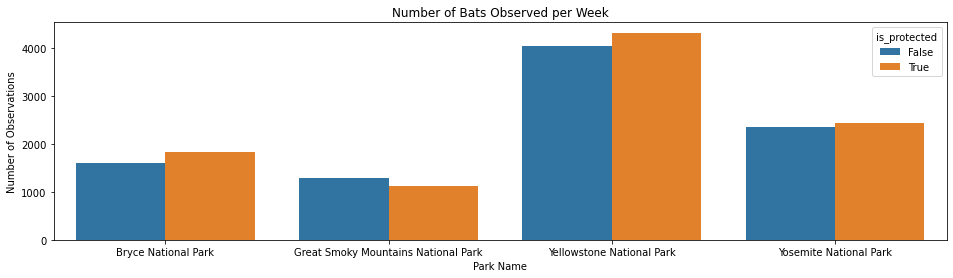

In [91]:
plt.figure(figsize=(16,4))
sns.barplot(x = obs_by_park.park_name, y=obs_by_park.observations, hue = obs_by_park.is_protected)
plt.xlabel("Park Name")
plt.ylabel("Number of Observations")
plt.title("Number of Bats Observed per Week")
plt.show()

# Conclusion
+ From this chart one can see that Yellowstone and Bryce National Parks seem to be doing a great job with their bat populations since there are more sightings of protected bats compared to non-protected species. The Great Smoky Mountains National Park might need to beef up there efforts in conservation as they have seen more non-protected species.4
+ This project was also able to answer some of the questions first posed in the beginning:
> What is the distribution of conservation status for species?
    The vast majority of species were not part of conservation.(5,633 vs 191)
> Are certain types of species more likely to be endangered?
    Mammals and Birds had the highest percentage of being in protection.
> Are the differences between species and their conservation status significant?
    While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
> Which animal is most prevalent and what is their distribution amongst parks?
    The study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.